# Решение задачи коллоквиума
*** Автор --- Ракитин Виталий, BD-11 ***

** Задача № 6: **

Пусть алгоритм, кластеризующий точки в многомерном Евклидовом пространстве оптимизирует критерий (k задано):
<img src="summ.png">
Покажите, что такой алгоритм эквивалентен стандартному алгоритму k-means.

In [1]:
import pylab as pl
import numpy as np
from sklearn.cluster import KMeans
# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Покажем, что данное утверждение на самом-то деле неверно. Для этого рассмотрим следующее множество точек:

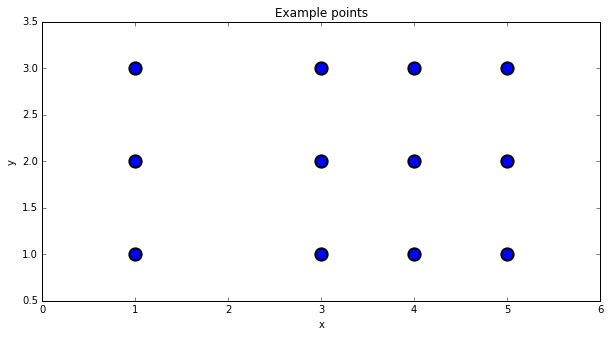

In [2]:
x = np.array([[1,1],[1,2],[1,3],[3,1],[3,2],[3,3],[4,1],[4,2],[4,3],[5,1],[5,2],[5,3]])

def myplot(x,name="Plot",color=None):
    pl.figure(figsize=(10, 5))
    pl.scatter(x[:, 0], x[:, 1],c = color,cmap=pl.cm.PuOr,lw=2, s=150)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(name)
    pl.show()
    
myplot(x, "Example points")

Кластеризуем наши точки с помочщью алгоритма k-means:

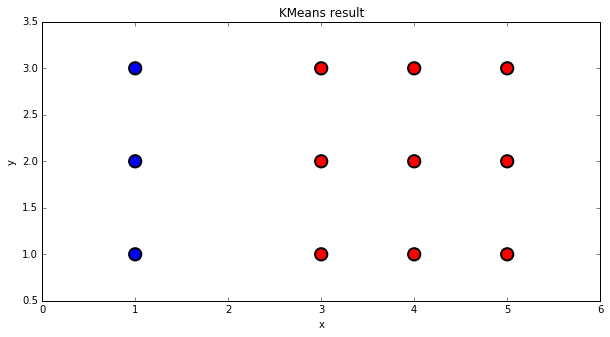

In [3]:
def make_color(y):
    colors = ["r","b"]
    return [colors[i] for i in y]

y_kmeans = KMeans(n_clusters=2).fit_predict(x)
color = make_color(y_kmeans)
myplot(x, "KMeans result",color)

Результат ожидаем. А теперь минимизируем наш критерий на данной выборке "в лоб":

In [4]:
def criteria(x,y):
    summ = 0
    for i,c1 in enumerate(x):
        for j,c2 in enumerate(x):
            if y[i] == y[j]: #точки лежат в одном кластере
                summ += np.linalg.norm(c1 - c2)**2
    return 0.5 * summ


def criteria_minimization():
    minimum = inf
    y_minimum = []
    #всего 12 точек
    for i1 in xrange(2): #1
        for i2 in xrange(2): #2
            for i3 in xrange(2): #3
                for i4 in xrange(2): #4
                    for i5 in xrange(2): #5
                        for i6 in xrange(2): #6
                            for i7 in xrange(2): #7
                                for i8 in xrange(2): #8
                                    for i9 in xrange(2): #9
                                        for i10 in xrange(2): #10
                                            for i11 in xrange(2): #11
                                                for i12 in xrange(2): #12
                                                    new_y = [i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12]
                                                    pt = criteria(x,new_y)
                                                    if pt < minimum:
                                                        minimum = pt
                                                        y_minimum = new_y
    return minimum, y_minimum

minimum, y_minimum = criteria_minimization()

Сравним значения критерия для результата работы k-means и для "идеальной" выборки с точки зрения данного критерия, а так же наглядно посмотрим, как же распределены точки.

In [5]:
print "J_KMeans = {0} \nJ_minimum = {1}".format(criteria(x,y_kmeans),criteria(x,y_minimum))

J_KMeans = 114.0 
J_minimum = 93.0


Очевидно видим, что минимальная сумма меньше. Посмотрим на результат кластеризации:

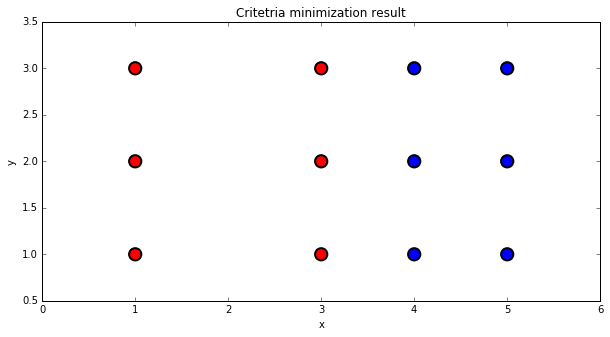

In [6]:
color = make_color(y_minimum)
myplot(x, "Critetria minimization result",color)

Результат кластеризации заметно отличается, и именно это позволяет нам утверждать о том, что такой алгоритм вовсе НЕ эквивалентен стандартному алгоритму k-means.